In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pymysql
import matplotlib.pyplot as plt
import datetime, time

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
conn = pymysql.connect(host = '166.104.80.140',
                       port = 3309,
                       user = 'root',
                       password = 'ys3110hs!!',
                       db = 'test_db1')

In [3]:
sql_input = "SELECT * FROM test_meat4"
value = pd.read_sql_query(sql_input, conn)
#revise_value=value.iloc[:50000]
value['Time'] = pd.to_datetime(value['stamp'], unit='ms')
value = value.set_index(value['Time'])
value = value.drop(['stamp'], axis = 1)
value

,Sensor,Value,Time
Time,,,
2024-02-26 01:14:41,,inf,2024-02-26 01:14:41
2024-02-26 01:14:41,MQ5,inf,2024-02-26 01:14:41
2024-02-26 01:14:42,MQ6,inf,2024-02-26 01:14:42
2024-02-26 01:14:42,MQ7,inf,2024-02-26 01:14:42
2024-02-26 01:14:42,MQ8,inf,2024-02-26 01:14:42
...,...,...,...
2024-02-26 01:45:39,TGS2602,0.980978906,2024-02-26 01:45:39
2024-02-26 01:45:39,TGS2612,0.981048763,2024-02-26 01:45:39
2024-02-26 01:45:40,MQ9,inf,2024-02-26 01:45:40


In [4]:
value_drop=['MQ5','MQ6','','MQ7','MQ8','MQ9','MQ10','MQ11','MQ12']
value2=value.drop(value[value['Sensor'].isin(value_drop)].index)
value2

,Sensor,Value,Time
Time,,,
2024-02-26 01:14:43,TGS2600,0.964582264,2024-02-26 01:14:43
2024-02-26 01:14:43,TGS2602,0.968155622,2024-02-26 01:14:43
2024-02-26 01:14:49,TGS2620,1.255828142,2024-02-26 01:14:49
2024-02-26 01:14:49,TGS2603,0.081540205,2024-02-26 01:14:49
2024-02-26 01:14:50,TGS2610,0.487364620,2024-02-26 01:14:50
...,...,...,...
2024-02-26 01:45:24,TGS2620,0.980158567,2024-02-26 01:45:24
2024-02-26 01:45:24,TGS2603,0.081540205,2024-02-26 01:45:24
2024-02-26 01:45:27,TGS2610,0.162454873,2024-02-26 01:45:27


In [5]:
sensor_dict = {}
for sensor, group in value2.groupby('Sensor'):
    sensor_dict[sensor] = group.drop(columns=['Sensor'])
sensor_dict

{'TGS2600':                            Value                Time
 Time                                                
 2024-02-26 01:14:43  0.964582264 2024-02-26 01:14:43
 2024-02-26 01:15:02  1.980268240 2024-02-26 01:15:02
 2024-02-26 01:15:17  1.731137753 2024-02-26 01:15:17
 2024-02-26 01:15:27  1.609766483 2024-02-26 01:15:27
 2024-02-26 01:15:38  1.469231248 2024-02-26 01:15:38
 ...                          ...                 ...
 2024-02-26 01:43:21  0.977358222 2024-02-26 01:43:21
 2024-02-26 01:43:54  1.022073984 2024-02-26 01:43:54
 2024-02-26 01:44:05  0.970970213 2024-02-26 01:44:05
 2024-02-26 01:44:19  0.970970213 2024-02-26 01:44:19
 2024-02-26 01:44:48  0.970970213 2024-02-26 01:44:48
 
 [77 rows x 2 columns],
 'TGS2602':                            Value                Time
 Time                                                
 2024-02-26 01:14:43  0.968155622 2024-02-26 01:14:43
 2024-02-26 01:15:02  1.929899693 2024-02-26 01:15:02
 2024-02-26 01:15:17  1.743962407 

In [6]:
Title = ['TGS2600','TGS2602','TGS2603','TGS2610','TGS2611','TGS2612','TGS2620']

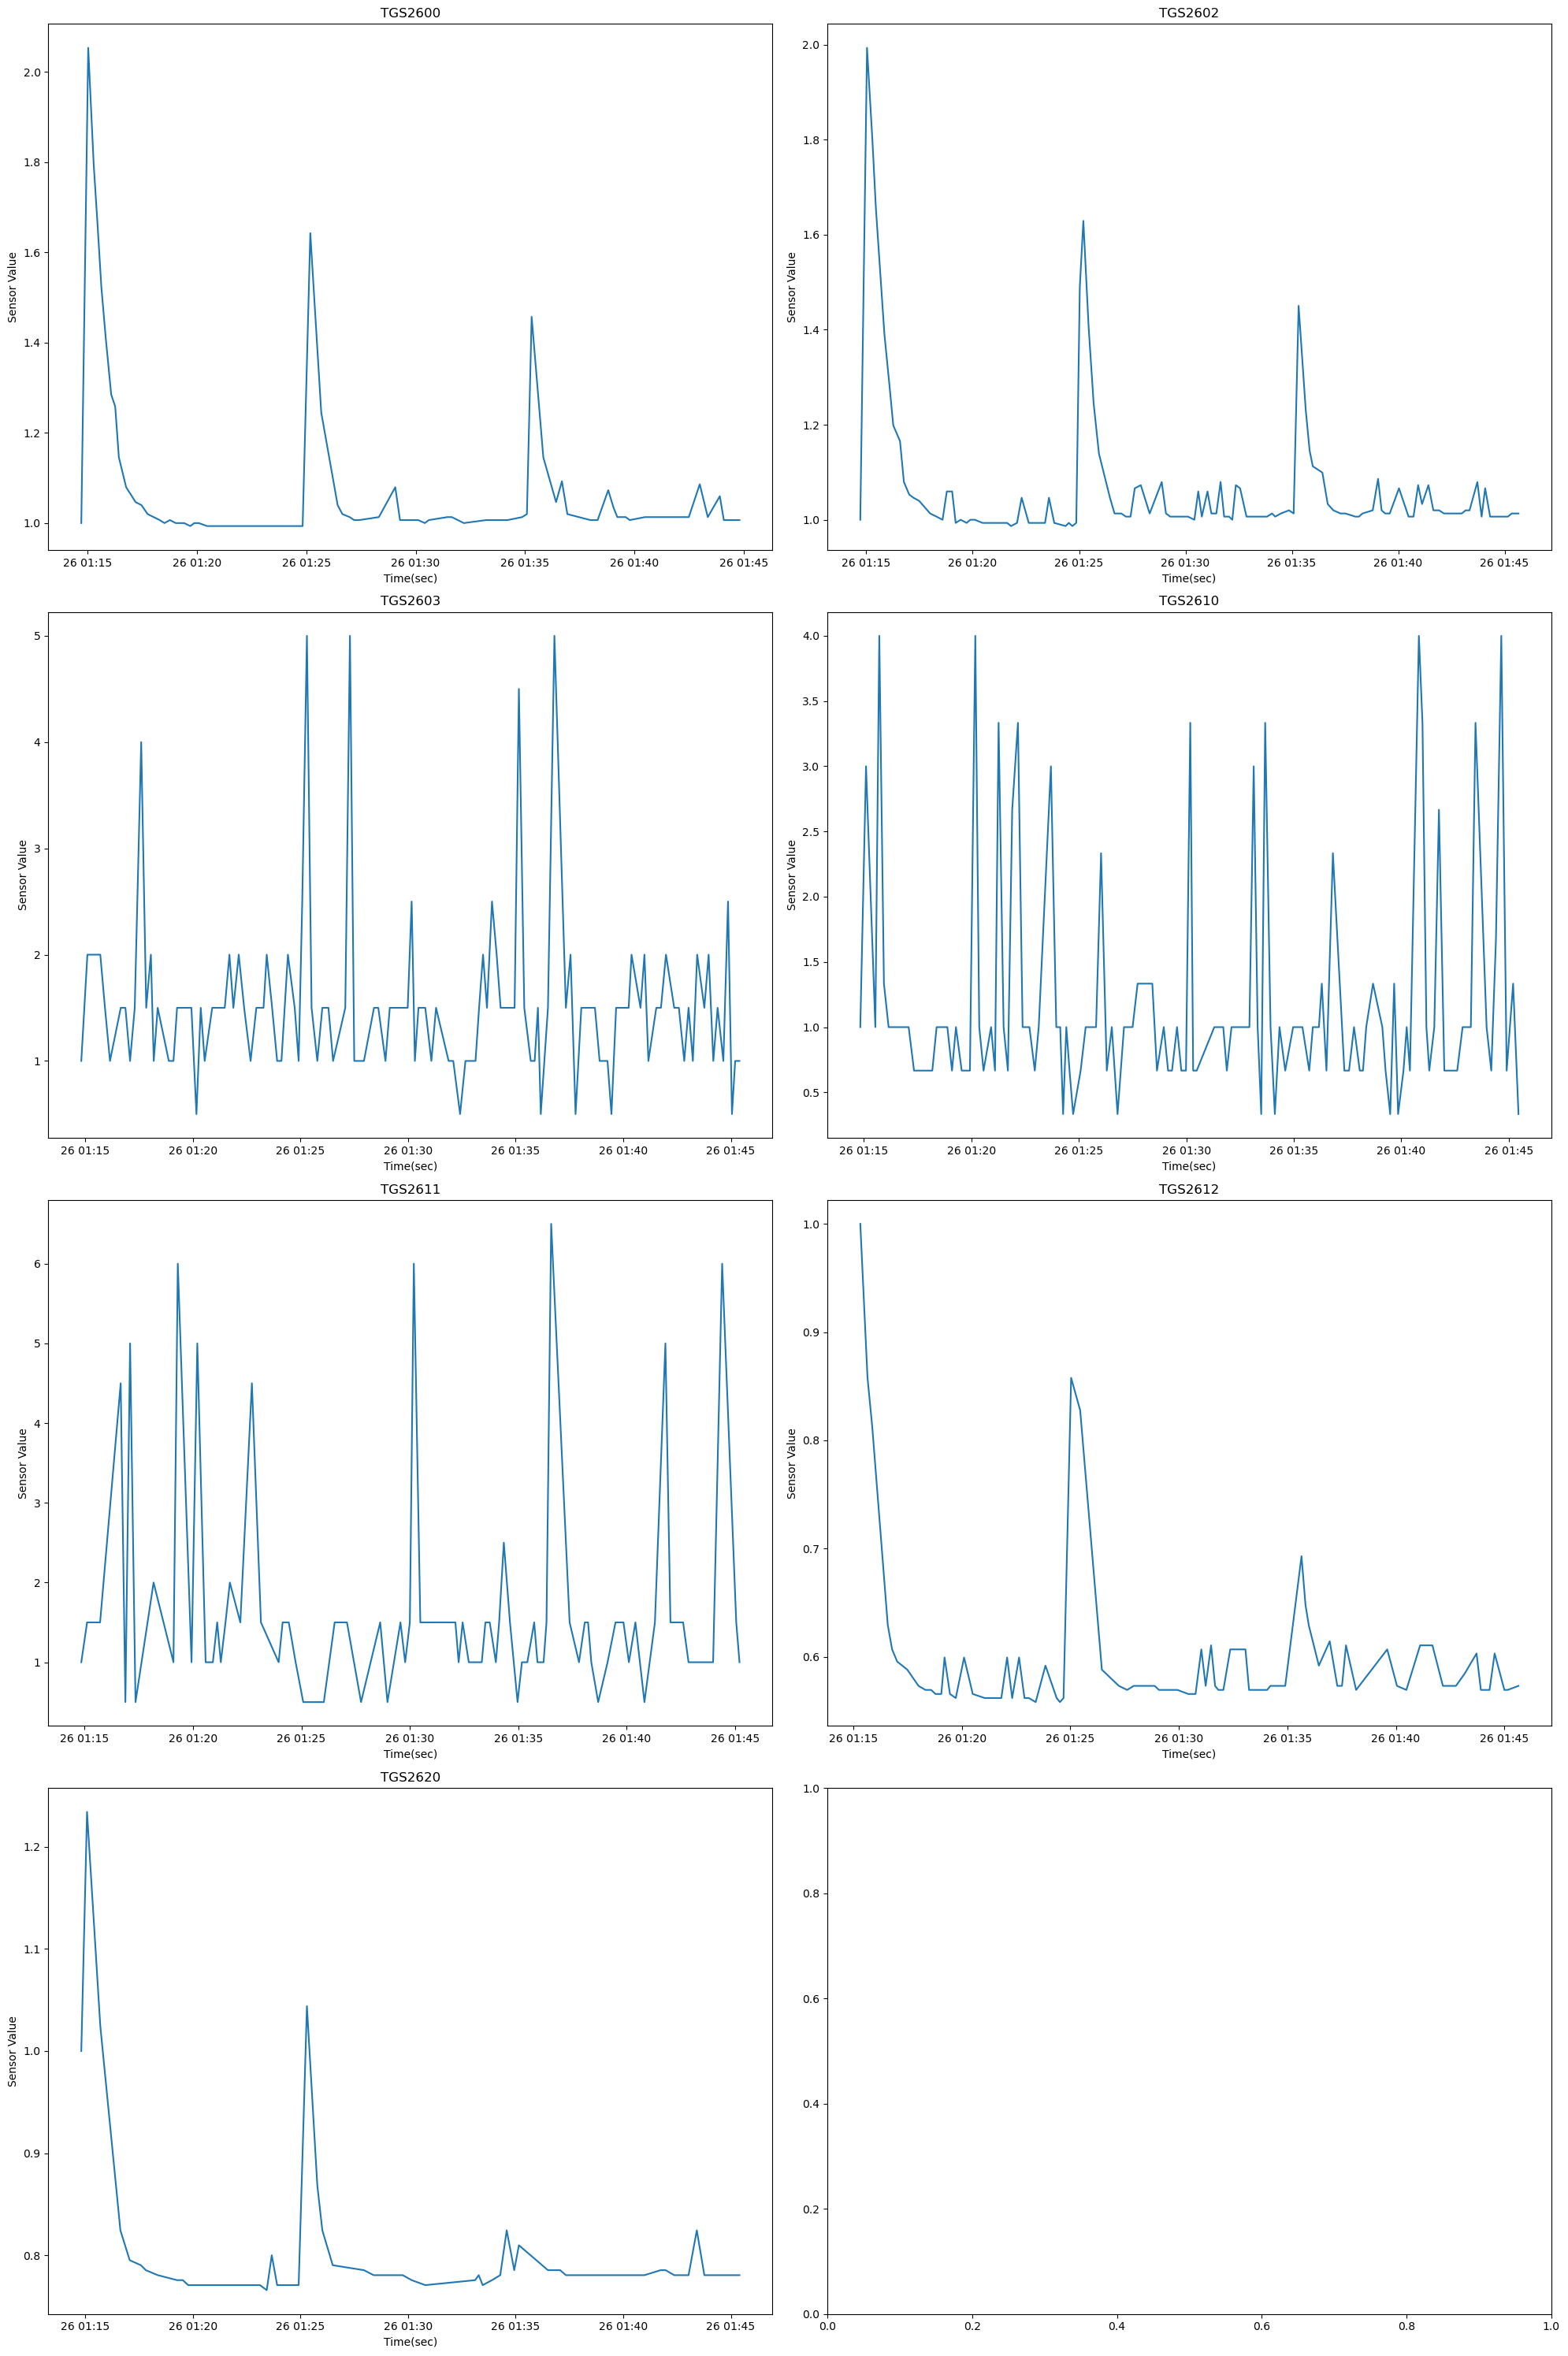

In [7]:
fig, axes = plt.subplots(nrows=len(sensor_dict)//2+1, ncols = 2, figsize=(20,30))
axes = axes.flatten()

for i, (sensor, data) in enumerate(sensor_dict.items()):
    data['Value'] = data['Value'].apply(pd.to_numeric)
    if data['Value'].iloc[0]!=0:
        data['Value'] = data['Value']/ data['Value'].iloc[0]
    ax = axes[i]
    ax.plot(data['Time'],data['Value'])
    ax.set_title(Title[i])
    ax.set_xlabel('Time(sec)')
    ax.set_ylabel('Sensor Value')
    #ax.set_xlim([-0.1,3500])
plt.tight_layout()